In [7]:
from __future__ import division
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy
import seaborn
seaborn.set_context({"figure.figsize": (15, 10)})

Scer FF 890 / 3034 0.2933
Scer RR 827 / 3034 0.2726
Scer FR 439 / 3034 0.1447
Scer RF 878 / 3034 0.2894


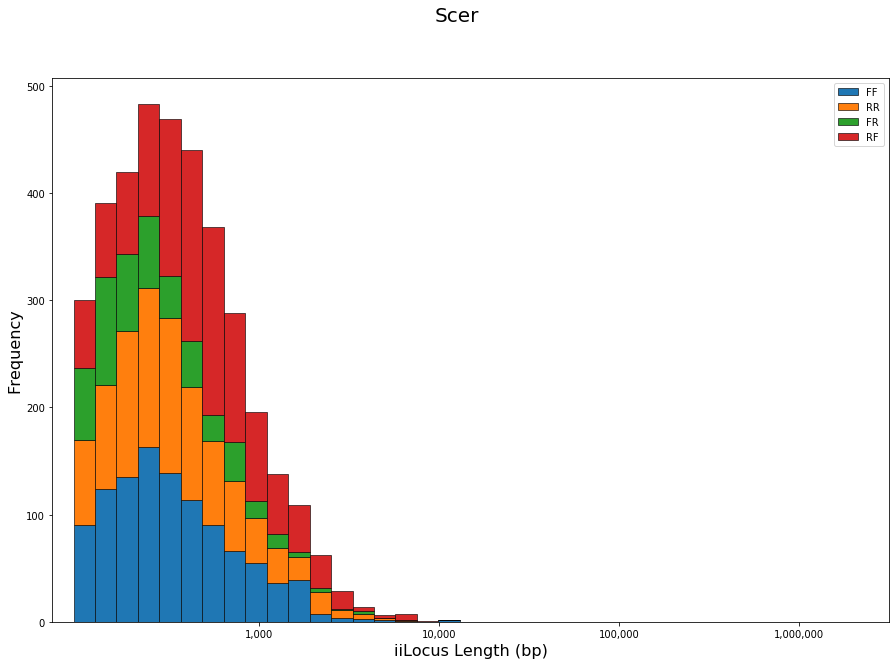

Cele FF 2867 / 10451 0.2743
Cele RR 2839 / 10451 0.2716
Cele FR 2457 / 10451 0.2351
Cele RF 2288 / 10451 0.2189


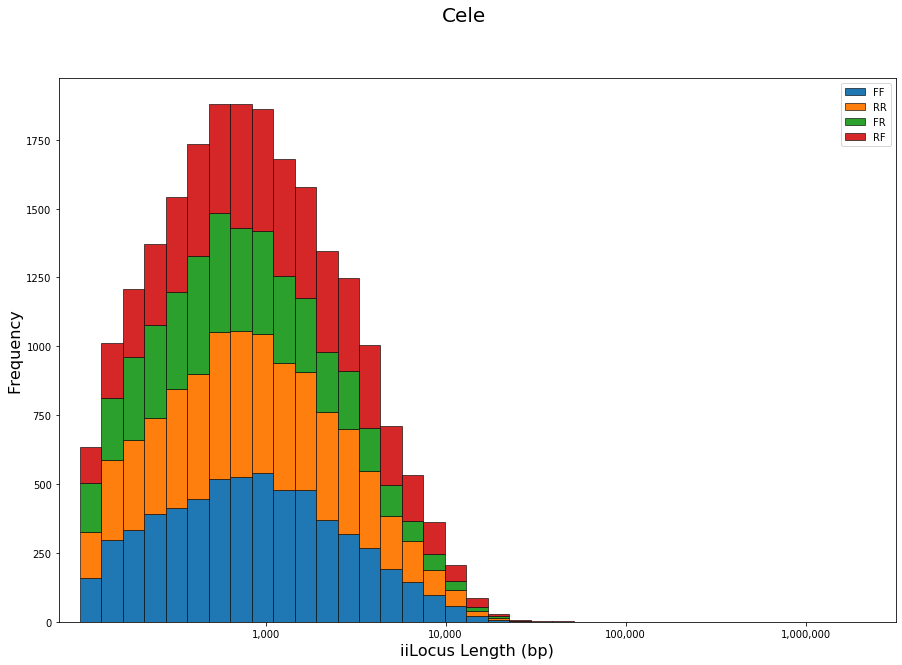

Crei FF 713 / 3496 0.2039
Crei RR 682 / 3496 0.1951
Crei FR 864 / 3496 0.2471
Crei RF 1237 / 3496 0.3538


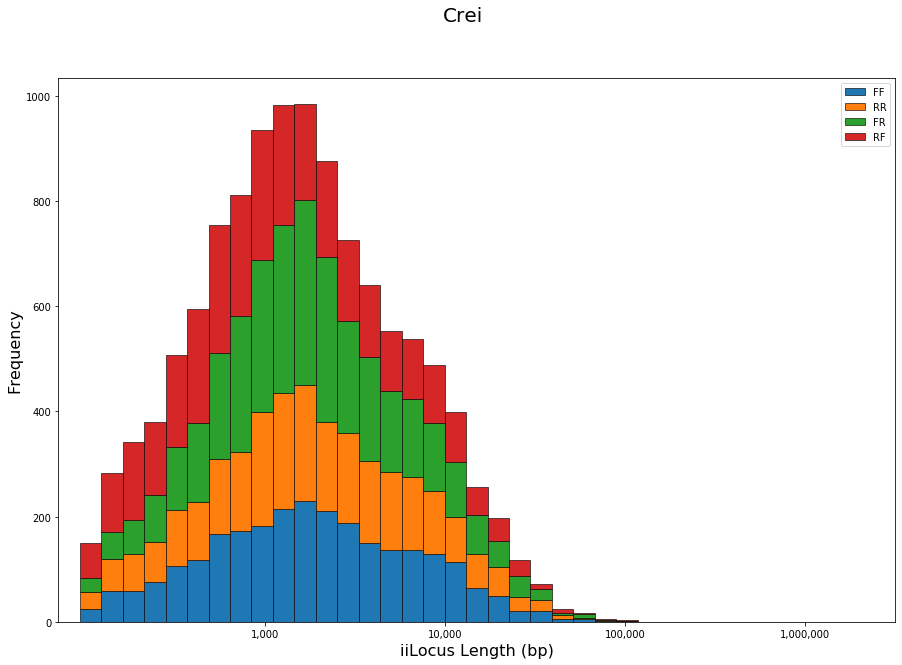

Mtru FF 1324 / 6217 0.2130
Mtru RR 1293 / 6217 0.2080
Mtru FR 2453 / 6217 0.3946
Mtru RF 1147 / 6217 0.1845


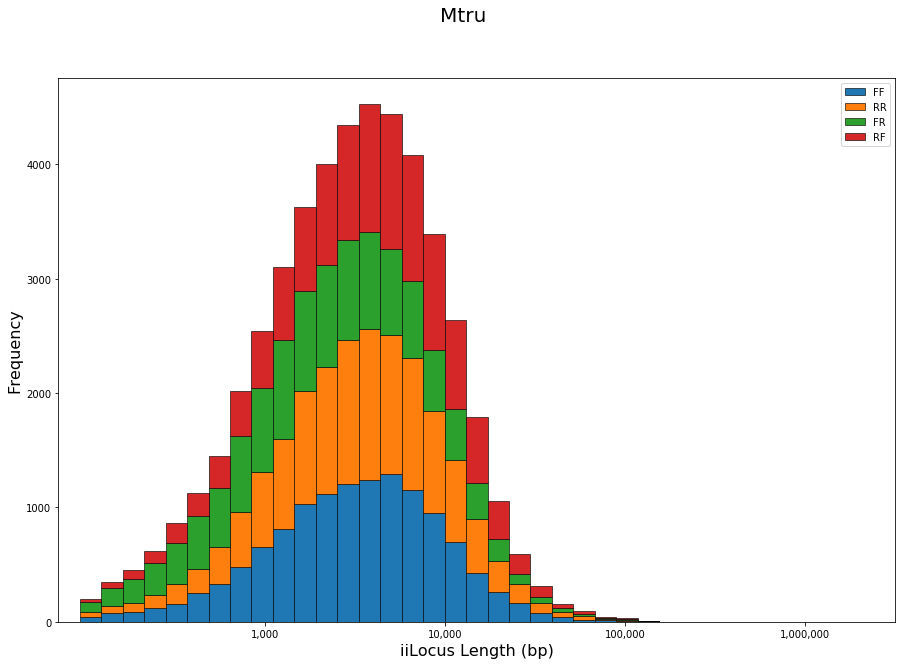

Agam FF 478 / 2019 0.2368
Agam RR 441 / 2019 0.2184
Agam FR 477 / 2019 0.2363
Agam RF 623 / 2019 0.3086


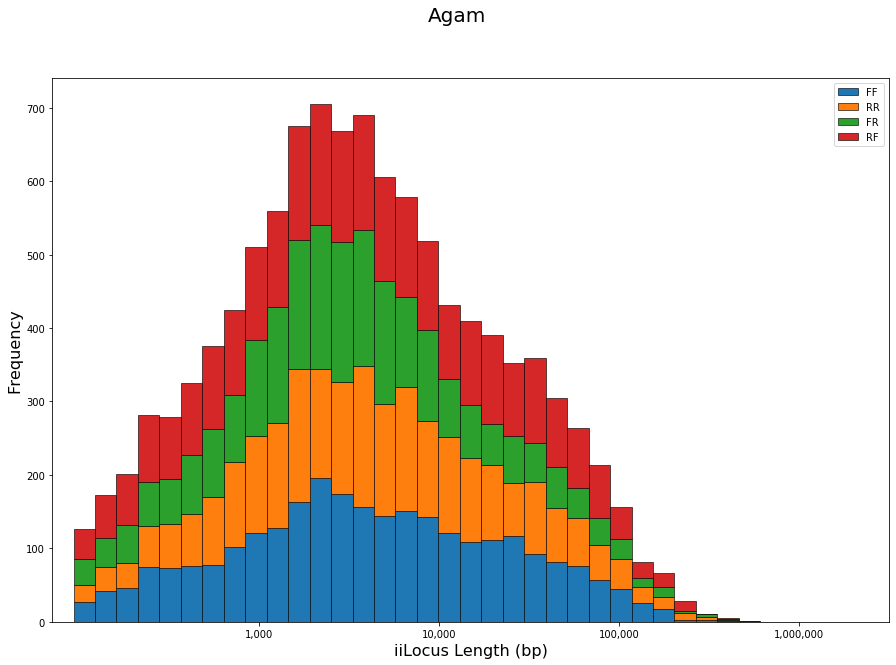

Dmel FF 1133 / 3287 0.3447
Dmel RR 696 / 3287 0.2117
Dmel FR 542 / 3287 0.1649
Dmel RF 916 / 3287 0.2787


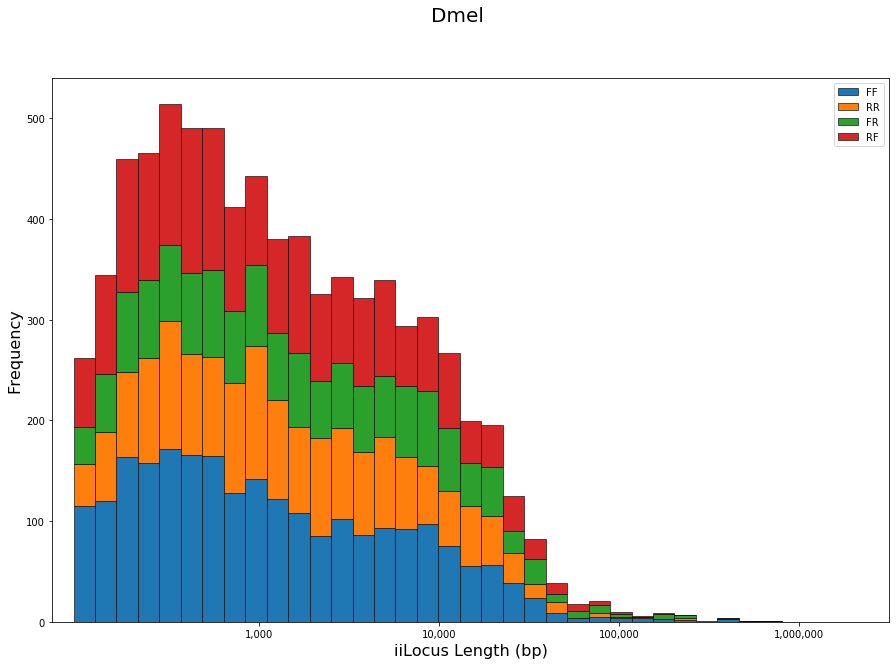

Xtro FF 657 / 2037 0.3225
Xtro RR 563 / 2037 0.2764
Xtro FR 430 / 2037 0.2111
Xtro RF 387 / 2037 0.1900


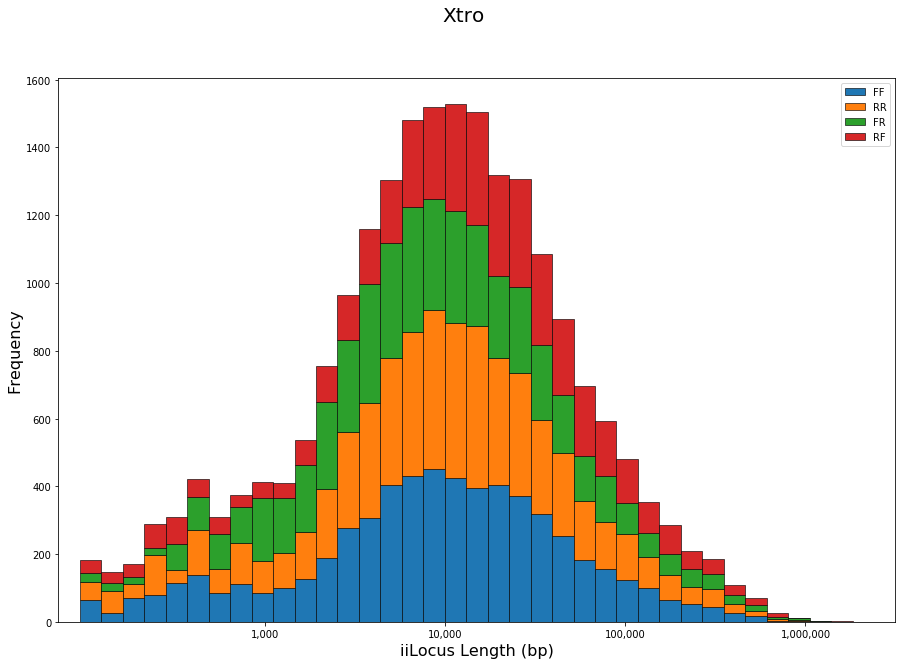

Drer FF 1312 / 3686 0.3559
Drer RR 1245 / 3686 0.3378
Drer FR 484 / 3686 0.1313
Drer RF 645 / 3686 0.1750


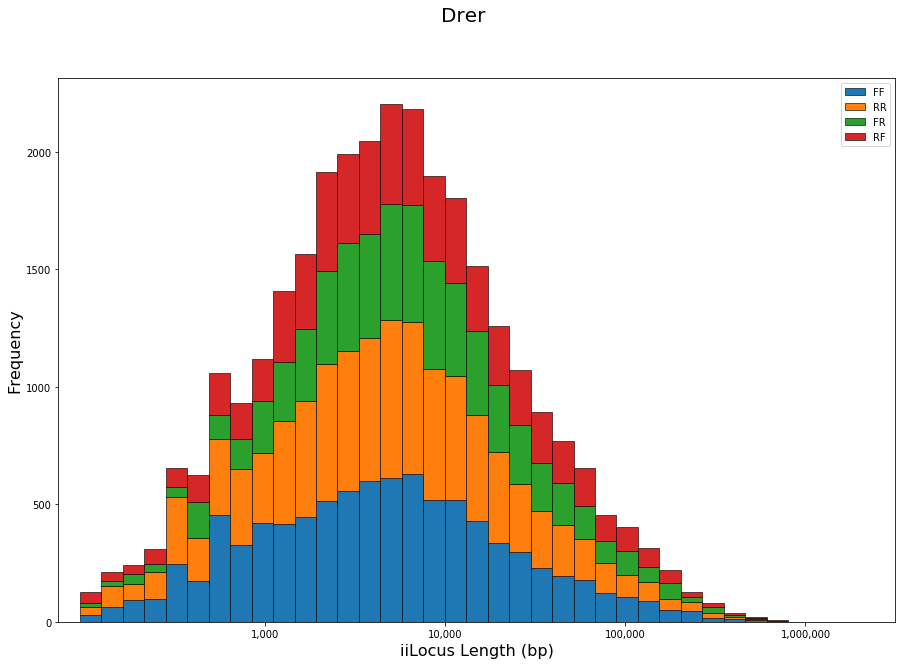

Mmus FF 329 / 1382 0.2381
Mmus RR 283 / 1382 0.2048
Mmus FR 426 / 1382 0.3082
Mmus RF 344 / 1382 0.2489


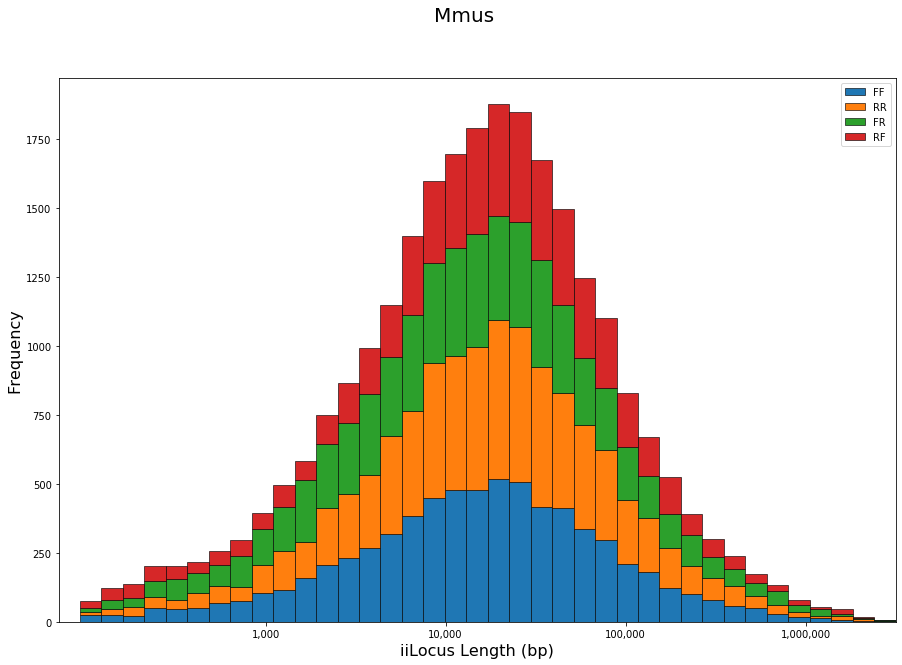

Hsap FF 345 / 1402 0.2461
Hsap RR 303 / 1402 0.2161
Hsap FR 351 / 1402 0.2504
Hsap RF 403 / 1402 0.2874


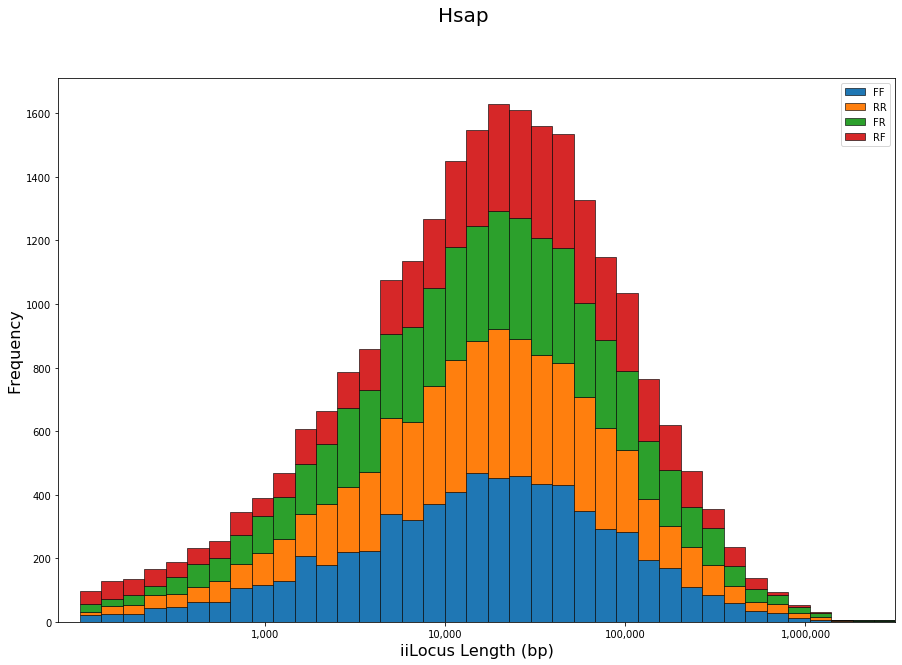

In [8]:
orientations = ['FF', 'RR', 'FR', 'RF']
for species in ['Scer', 'Cele', 'Crei', 'Mtru', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']:
    datafile = 'data/{}/{}.iloci.tsv'.format(species, species)
#    shuffile = 'species/{}/{}.iloci.shuffled.tsv'.format(species, species)
    data = pandas.read_table(datafile)
    data['LogLength'] = numpy.log10(data['Length'])
#    shufdata = pandas.read_table(shuffile)
#    shufdata['LogLength'] = numpy.log10(shufdata['Length'])
    
    iiloci = data.loc[data.LocusClass == 'iiLocus']
    short = iiloci.loc[iiloci.Length < 750]
#    shufiiloci = shufdata.loc[shufdata.LocusClass == 'iiLocus']
    #print(shufiiloci.head())
    subsets = list()
    shufsubsets = list()
    for orient in orientations:
        # subset = iiloci.loc[(iiloci.FlankGeneOrient == orient) & (iiloci.Length > 10000)]
        subset = iiloci.loc[(iiloci.FlankGeneOrient == orient)]
        subsets.append(subset['LogLength'])
        shortsubset = short.loc[short.FlankGeneOrient == orient]
        print(species, orient, '{} / {}'.format(len(shortsubset), len(short)), '{:.4f}'.format(len(shortsubset) / len(short)))
#        shufsubset = shufiiloci.loc[(shufiiloci.FlankGeneOrient == orient)]
#        shufsubsets.append(shufsubset['LogLength'])

    fig, axis = plt.subplots()
    #_ = plt.subplot(121)
    _ = plt.hist(subsets, stacked=True, bins=numpy.log10(numpy.logspace(1.85, 6.5, 40)), label=orientations, edgecolor='black', linewidth=0.6)
    #_ = plt.title('Observed')
    _ = plt.legend()
    #_ = plt.subplot(122)
    #_ = plt.hist(shufsubsets, stacked=True, bins=20, label=orientations)
    #_ = plt.title('Shuffled')
    #_ = plt.legend()
    _ = axis.set_xlabel('iiLocus Length (bp)', fontsize=16)
    _ = axis.set_ylabel('Frequency', fontsize=16)
    _ = axis.set_xlim((1.85, 6.5))
    _ = axis.set_xticks([3, 4, 5, 6])
    _ = axis.set_xticklabels(['1,000', '10,000', '100,000', '1,000,000'])
    _ = plt.suptitle(species, fontsize=20)
    _ = plt.show()

In [5]:
numpy.logspace(2, 6.5, 25)

array([1.00000000e+02, 1.53992653e+02, 2.37137371e+02, 3.65174127e+02,
       5.62341325e+02, 8.65964323e+02, 1.33352143e+03, 2.05352503e+03,
       3.16227766e+03, 4.86967525e+03, 7.49894209e+03, 1.15478198e+04,
       1.77827941e+04, 2.73841963e+04, 4.21696503e+04, 6.49381632e+04,
       1.00000000e+05, 1.53992653e+05, 2.37137371e+05, 3.65174127e+05,
       5.62341325e+05, 8.65964323e+05, 1.33352143e+06, 2.05352503e+06,
       3.16227766e+06])